## Business Understanding

The dataset dataset provides a detailed and comprehensive collection of aviation dataset which will help us determine which aircraft are the lowest risk for the company to start in this new aviation business. 

It encompases a wide range of information and from this, the stakeholder is interested to uncover trends and insights regarding aviation accidents in the USA and in international waters from 1962 to 2023.

### Business Goal

#### 1. Understanding Aviation risks:
Identify key factors that influence flight accidents, such as year, instrument use,location engines, purpose…
#### 2. Identifying Trends:
Explore patterns in accidents across various countries, period…
#### 3. Recommendations
Provide actionable recommendations to minimize the accidents and fatalities .

### Questions to Address:
 1. Does evolution of time has an influence on the number of accidents?
2. Is purpose of the aircraft a contributing factor to accidents?
3. Is the weather instrument in use to measure the condition a contributing factor?
4. Does the number of engines a contributing factor?


## Data Understanding

While we have quite a number of feature in the datset, we will explore them below and focus and the data meeting the qualities of good data.

## Loading the data 

In [179]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [180]:
# Loading the dataset
# Using "latin1" encoding to handle special characters
# Setting low_memory to False to avoid DtypeWarning for mixed types in columns (Column 6,7,28)

df=pd.read_csv ('AviationData.csv',encoding='latin1',low_memory=False)

# Displaying the first few rows to better understand the data set
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Exploratory Data Analysis - EDA with initial cleaning

In [181]:
#Lets look at the shape of our dataset to display the number of rows and columns

print("Shape of the dataset:", df.shape)

Shape of the dataset: (88889, 31)


In [182]:
# We now want to look into our column names
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [183]:
# Replacing period (".") in column names with underscores(_) to enhance readability and consistency

df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [184]:
# We are now finding further  information about data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50249 non-null  object 
 9   Airport_Name            52790 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87572 non-null  object 
 14  Make                    88826 non-null

### Clearly the data above contains a lot of missing values. We therefore need to look more into the missing values, identify the columns that we need to keep and the columns that we need to drop.

In [185]:
#Let us now  check and compute the counts of missing values per columns
df.isnull().sum().sort_values(ascending=False)


Schedule                  76307
Air_carrier               72241
FAR_Description           56866
Aircraft_Category         56602
Longitude                 54516
Latitude                  54507
Airport_Code              38640
Airport_Name              36099
Broad_phase_of_flight     27165
Publication_Date          13771
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Fatal_Injuries      11401
Engine_Type                7077
Report_Status              6381
Purpose_of_flight          6192
Number_of_Engines          6084
Total_Uninjured            5912
Weather_Condition          4492
Aircraft_damage            3194
Registration_Number        1317
Injury_Severity            1000
Country                     226
Amateur_Built               102
Model                        92
Make                         63
Location                     52
Investigation_Type            0
Event_Date                    0
Accident_Number               0
Event_Id                      0
dtype: i

In [186]:
#We now want to look into the proportion of the missing values in the data set to see which columns to drop
df.isnull().mean()*100

Event_Id                   0.000000
Investigation_Type         0.000000
Accident_Number            0.000000
Event_Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport_Code              43.469946
Airport_Name              40.611324
Injury_Severity            1.124999
Aircraft_damage            3.593246
Aircraft_Category         63.677170
Registration_Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur_Built              0.114750
Number_of_Engines          6.844491
Engine_Type                7.961615
FAR_Description           63.974170
Schedule                  85.845268
Purpose_of_flight          6.965991
Air_carrier               81.271023
Total_Fatal_Injuries      12.826109
Total_Serious_Injuries    14.073732
Total_Minor_Injuries      13.424608
Total_Uninjured            6.650992
Weather_Condition          5

### Clearly we need to drop the columns having more missing values, For this case, I will set a threshold of 35%. Any column with missing values above 35% will be dropped
### Columns with >35% missing data often lack enough information to draw meaningful conclusions. Imputing  such a large gap of missing values risks introducing significant bias or noise into your analysis.Again columns with many missing values are less relevant to any anlysis hence the need to drop them.

In [187]:

# Step 1: Calculate missing values
threshold = 0.35
missing_percent = df.isnull().mean()
Column_Most_missing = missing_percent[missing_percent > threshold].index.tolist()

# Step 2: Drop columns (if any exist)
if len(Column_Most_missing) > 0:
    df = df.drop(columns=Column_Most_missing)
    print("Columns dropped:", Column_Most_missing)
else:
    print("No columns exceeded the 35% missing threshold.")

# Step 3: Verify changes
print(df.head())

Columns dropped: ['Latitude', 'Longitude', 'Airport_Code', 'Airport_Name', 'Aircraft_Category', 'FAR_Description', 'Schedule', 'Air_carrier']
         Event_Id Investigation_Type Accident_Number  Event_Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Injury_Severity Aircraft_damage  \
0  MOOSE CREEK, ID  United States        Fatal(2)       Destroyed   
1   BRIDGEPORT, CA  United States        Fatal(4)       Destroyed   
2    Saltville, VA  United States        Fatal(3)       Destroyed   
3       EUREKA, CA  United States        Fatal(2)       Destroyed   
4       Canton, OH  United States        Fatal(1)       Destroyed   

  Registration_Number      Make  .

In [188]:
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [189]:
#To check some descriptive 

df.describe()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [190]:
# Convert event_date column to datetime format
df['Event_Date'] = pd.to_datetime(df['Event_Date'])


# Extracting the year from the event_date column and creating a new column "Year"
df['Year'] = df['Event_Date'].dt.year
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


In [191]:
#Let us now see the sum of missing values from the retained columns
df.isnull().sum()


Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Injury_Severity            1000
Aircraft_damage            3194
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
Purpose_of_flight          6192
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Year                          0
dtype: int64

In [192]:
#Are there any duplicates? Let us see and confirm
df.duplicated().sum()

0

##### We do not have any duplicate values as seen from the above output

In [193]:
# Let us now check the data types of the columns before we proceed

print(df.dtypes)

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Injury_Severity                   object
Aircraft_damage                   object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
Purpose_of_flight                 object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Weather_Condition                 object
Broad_phase_of_flight             object
Report_Status                     object
Publication_Date                  object
Year                               int64
dtype: object


In [194]:
df['Investigation_Type'].unique()

array(['Accident', 'Incident'], dtype=object)

In [195]:
df['Aircraft_damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [196]:
df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [197]:
df['Engine_Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [198]:
df['Purpose_of_flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [199]:
df['Weather_Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [200]:
#Looking into the above output, we need to combine unk and UNK together
df['Weather_Condition']=df['Weather_Condition'].replace('Unk','UNK')
df['Weather_Condition']

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    NaN
88885    NaN
88886    VMC
88887    NaN
88888    NaN
Name: Weather_Condition, Length: 88889, dtype: object

In [201]:
df['Engine_Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [202]:
df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


## Exploration of  some categorical variables

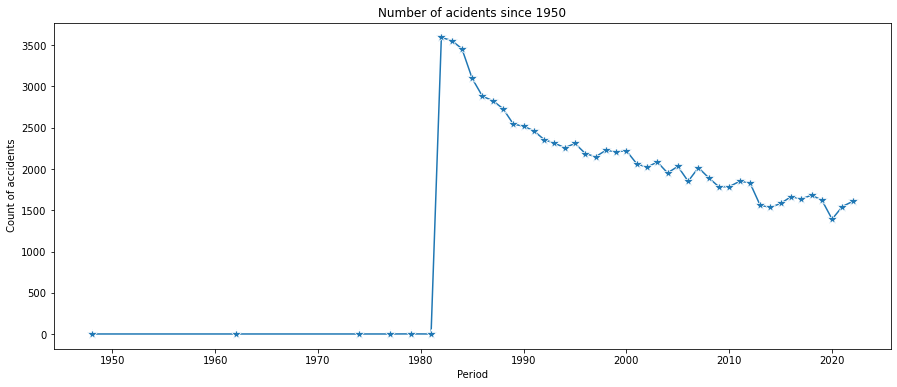

In [203]:
#Grouping while summarizing the counts per group 
yr_count=df.groupby('Year')['Event_Id'].count().reset_index()

#visualizing the output
plt.figure(figsize=(15,6))
sns.lineplot(data=yr_count, x= 'Year', y='Event_Id', marker='*',markersize=10).set(title="Number of acidents since 1950", xlabel='Period', ylabel=' Count of accidents')
plt.show()

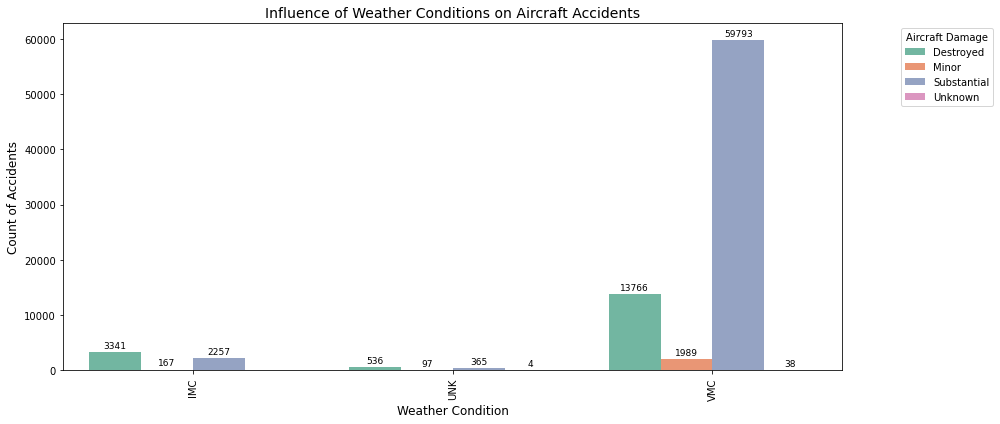

In [204]:
# Clean data (drop missing values)
df_clean = df.dropna(subset=['Weather_Condition', 'Aircraft_damage'])

# Group data by Weather Condition and Aircraft Damage
Weather_condition = df_clean.groupby(['Weather_Condition', 'Aircraft_damage'])['Event_Id'].count().reset_index()

# Define custom colors (adjust based on unique Aircraft_damage categories)
unique_damage_categories = df_clean['Aircraft_damage'].nunique()
custom_palette = sns.color_palette("Set2", n_colors=unique_damage_categories)

# Create the plot
plt.figure(figsize=(14, 6))  # Wider figure
ax = sns.barplot(
    data=Weather_condition,
    x='Weather_Condition',
    y='Event_Id',
    hue='Aircraft_damage',
    palette=custom_palette
)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip labeling bars with height=0
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=9,
            xytext=(0, 2),
            textcoords='offset points'
        )

# Customize titles and labels
plt.title("Influence of Weather Conditions on Aircraft Accidents", fontsize=14)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Count of Accidents", fontsize=12)
plt.xticks(rotation=90, ha='center')  # Rotate x-labels vertically

# Adjust legend
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.2, 1), loc='upper right')

plt.tight_layout()
plt.show()

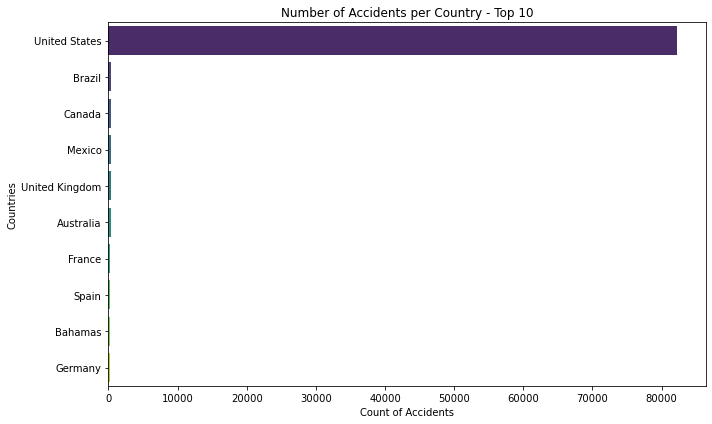

In [205]:
# Check top 10 countries with accidents
cntr = df.groupby(['Country'])['Event_Id'].count().reset_index() \
         .sort_values(by='Event_Id', ascending=False).head(10)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=cntr, 
    y='Country', 
    x='Event_Id', 
    orient="h",  # Use "h" for horizontal orientation
    palette="viridis"  # Optional: Add color for better readability
).set(
    title="Number of Accidents per Country - Top 10", 
    xlabel='Count of Accidents', 
    ylabel='Countries'
)

plt.tight_layout()
plt.show()

United States had the most number of accidents with the rest of the countries having very low number of aircraft accidents.

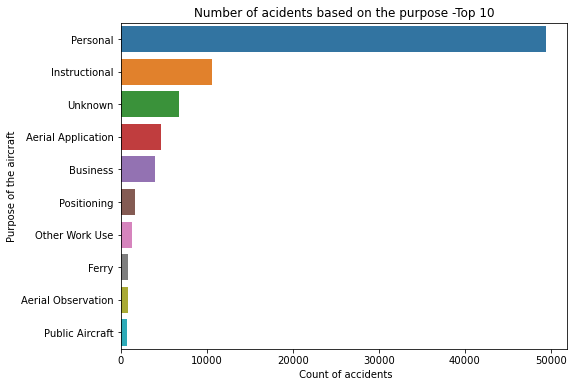

In [206]:
#Check purposes with accidents

cntr=df.groupby(['Purpose_of_flight'])['Event_Id'].count().reset_index().sort_values(by='Event_Id', ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=cntr, y='Purpose_of_flight', x='Event_Id', orient="h").set(title="Number of acidents based on the purpose -Top 10", ylabel='Purpose of the aircraft', xlabel=' Count of accidents')
plt.show()

Personal aircrafts led to the highest number of accidents followed by instructional aircrafts.Public aircrafts, however caused the least number of accidents calling for the question of how experienced the pilots flying the personal aircrafts are and how frequent the personal aircrafts are serviced compared to the public aircrafts.

#### Exploring some numerical variables

In [207]:
#subset the data into numerical variables only
num_var=df.select_dtypes(include=['number']).drop(columns=['Year'])
num_var.head(3)

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,NaN,NaN,NaN


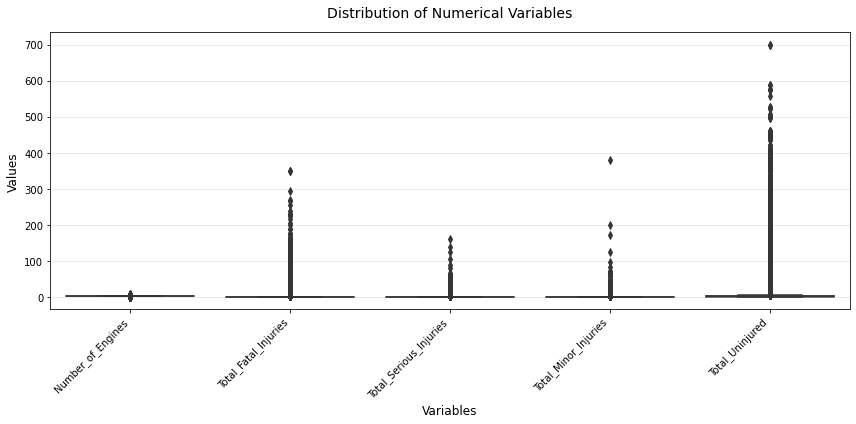

In [208]:
#Visualize the distribution
# Visualize distribution of numerical variables
plt.figure(figsize=(12, 6))

# Melt numerical variables to long format
num_var_long = num_var.melt(var_name='Variable', value_name='Value')

# Create boxplot
sns.boxplot(
    data=num_var_long,
    x='Variable',
    y='Value',
    palette='viridis'
)

# Improve formatting
plt.title("Distribution of Numerical Variables", fontsize=14, pad=15)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability

# Add gridlines
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

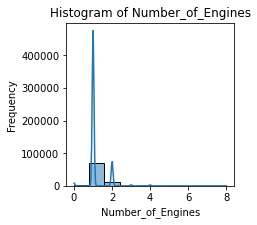

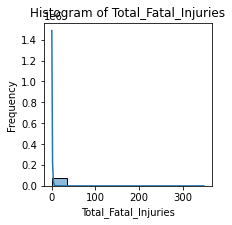

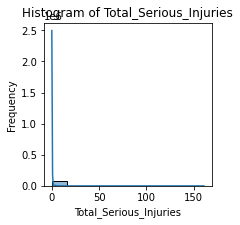

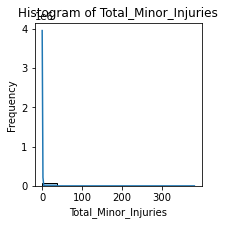

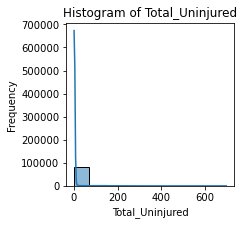

In [209]:
#Create individual figure for each numerical visual
for column in num_var.columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(data=num_var, x=column, kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Further Data Cleaning

In [210]:
#Check the count of missing data  in columns for which the count is greater than zero
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]

missing_cols

Location                     52
Country                     226
Injury_Severity            1000
Aircraft_damage            3194
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
Purpose_of_flight          6192
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
dtype: int64

In [211]:
# We are now replacing the missing values for Location by mode of each country
df['Location']=df['Location'].fillna(df.groupby('Country')['Location'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

In [212]:
# Replace the missing for Location by mode of countries. 3 locations are unable to clear because they are not associated to any country
df['Country']=df['Country'].fillna(df['Country'].mode()[0])

In [213]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Number_of_Engines         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [214]:
#We replace the make with the mode and for the model with the mode of each make. 14 models are unable to clean up since they are not associated to any make
df['Make']=df['Make'].fillna(df['Make'].mode()[0])
df['Model']=df['Model'].fillna(df.groupby('Make')['Model'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))


In [215]:
#Report status, Registration.Number, and Publication date  are of no interest to our goal, so I drop them
df=df.drop(columns=['Report_Status','Publication_Date','Registration_Number'], axis=1)

In [216]:
# We now replacing the Engine type with the mode of make and Model
df['Engine_Type']=df['Engine_Type'].fillna(df.groupby(['Make','Model'])['Engine_Type'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

In [217]:
#For the number of engines, we replace the missing values with the mode. This is because in our analysis,we would like to treat this variable as categorical
df['Number_of_Engines']=df['Number_of_Engines'].fillna(df['Number_of_Engines'].mode()[0]).astype('int')

#replace aircraft with zero number of enngine with the mode as well
df['Number_of_Engines']=df['Number_of_Engines'].replace(0,df['Number_of_Engines'].mode()[0])

In [218]:
# Finally, let us replace the rest of columns with mode

In [219]:
df['Weather_Condition']=df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])


In [220]:
df['Purpose_of_flight']=df['Purpose_of_flight'].fillna(df['Purpose_of_flight'].mode()[0])

In [221]:
df['Amateur_Built']=df['Amateur_Built'].fillna(df['Amateur_Built'].mode()[0])


In [222]:
df['Injury_Severity']=df['Injury_Severity'].fillna(df['Injury_Severity'].mode()[0])


In [223]:
df['Aircraft_damage']= df['Aircraft_damage'].fillna(df['Aircraft_damage'].mode()[0])


In [224]:
#Check if we still have missing values
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
missing_cols

Location                     4
Model                       14
Engine_Type               2105
Broad_phase_of_flight    27165
dtype: int64

In [225]:
#Since we still have missing values, we therefore need to drop all the above records

In [226]:
df=df.dropna(axis=0)

In [227]:
#Confirm no missing
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
missing_cols

Series([], dtype: int64)

In [228]:
df.shape

(61467, 21)

In [229]:

# We will now drop the data before 1980 as they do not give the actual picture of the number of accidents in those years due to insufficiency or inadequacy

In [230]:
df=df[df['Year']>1981]

In [231]:
df.shape # 6 records have been dropped

(61460, 21)

In [232]:
df.head(3)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Year
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,...,1,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,...,2,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,...,1,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,1982


In [233]:
# We will now quickly focus on descriptive analysis of numerical variables
df.describe(include='number')

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Year
count,61460.000000,61460.000000,61460.000000,61460.000000,61460.000000,61460.000000
mean,1.161211,0.508203,0.248874,0.396668,4.703176,1992.861731
std,0.425721,2.582943,0.775299,1.599520,24.413473,7.549490
min,1.000000,0.000000,0.000000,0.000000,0.000000,1982.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1986.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1992.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000,1999.000000
max,4.000000,265.000000,81.000000,171.000000,699.000000,2007.000000


In [234]:
#Let us now see a quick descriptive analysis of categorical variables
df.describe(exclude ='number')

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Amateur_Built,Engine_Type,Purpose_of_flight,Weather_Condition,Broad_phase_of_flight
count,61460,61460,61460,61460,61460,61460,61460,61460,61460,61460,61460,61460,61460,61460,61460
unique,60593,2,61460,9391,16655,47,53,3,4484,8417,2,6,22,3,12
top,20001212X19172,Accident,SEA82DA022,1984-06-30 00:00:00,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Cessna,152,No,Reciprocating,Personal,VMC,Landing
freq,3,59559,1,25,442,61110,47980,44915,20715,2116,55934,53113,36405,56206,15340
first,NaN,NaN,NaN,1982-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2007-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Now that the data is fully cleaned , we can now perform further analysis and have more insights drawn

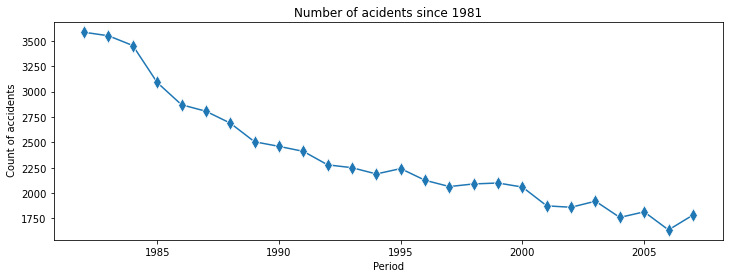

In [235]:
#Check if there is significant pattern in accidents over years
yr_count=df.groupby('Year')['Event_Id'].count().reset_index()
plt.figure(figsize=(12,4))
sns.lineplot(data=yr_count, x='Year', y='Event_Id', marker='d',markersize=10).set(title="Number of acidents since 1981", xlabel='Period', ylabel=' Count of accidents')
plt.savefig("Linegraph1.png", dpi=500, bbox_inches="tight")
plt.show()


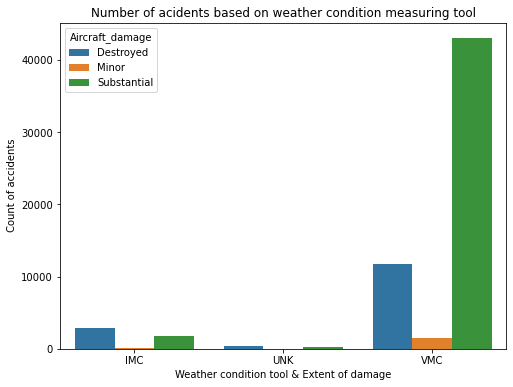

In [236]:
# Lets also explore the effect of weather in regards to the accidents
Weather_cnd=df.groupby(['Weather_Condition','Aircraft_damage'])['Event_Id'].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=Weather_cnd, x='Weather_Condition', y='Event_Id', hue='Aircraft_damage').set(title="Number of acidents based on weather condition measuring tool", xlabel='Weather condition tool & Extent of damage', ylabel=' Count of accidents')
#Export the graph
plt.savefig("barplot4.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

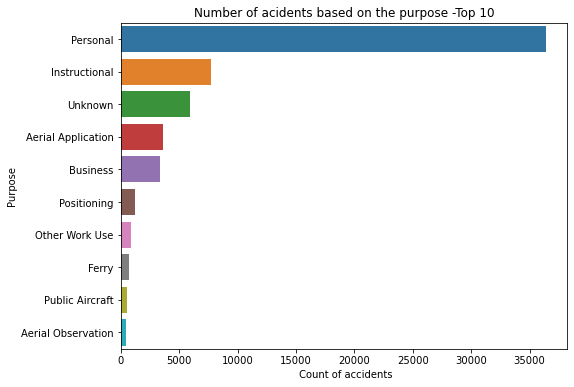

In [237]:
# We further would like to check the accidents occurence with the intended purpose of the aircraft


purp=df.groupby(['Purpose_of_flight'])['Event_Id'].count().reset_index().sort_values(by='Event_Id', ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=purp, y='Purpose_of_flight', x='Event_Id', orient="h").set(title="Number of acidents based on the purpose -Top 10", ylabel='Purpose', xlabel=' Count of accidents')

#Export the graph
plt.savefig("barplot2.png", dpi=500, bbox_inches="tight")

#Render the output
plt.show()

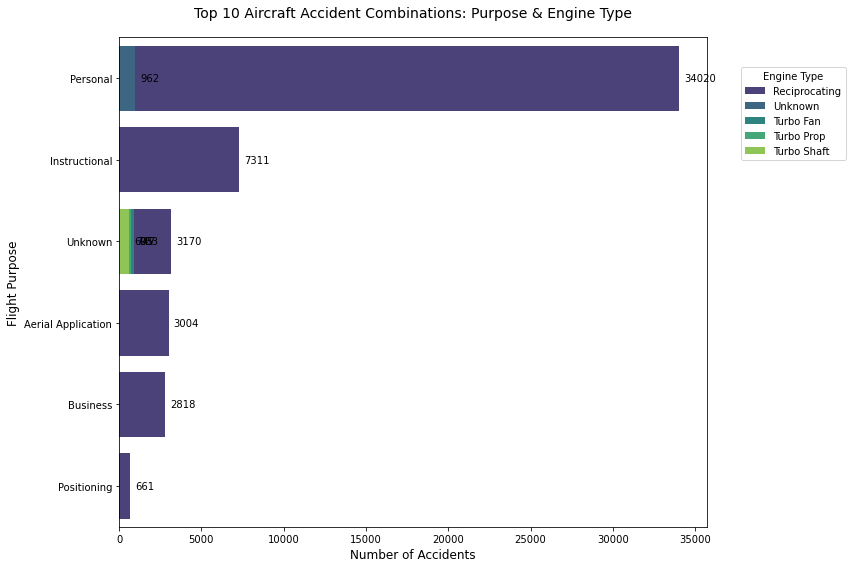

In [238]:
#We further would like to check the accidents occurence with the intended purpose and Engine type of the aircraft


# Group data and replace NaN with 0
purpose_engine = df.groupby(['Purpose_of_flight', 'Engine_Type'])['Event_Id'] \
                   .count() \
                   .reset_index(name='Accident_Count') \
                   .fillna(0)  # Replace NaN with 0
purpose_engine = purpose_engine.sort_values(by='Accident_Count', ascending=False).head(10)

# Create visualization
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=purpose_engine,
    y='Purpose_of_flight',
    x='Accident_Count',
    hue='Engine_Type',
    palette='viridis',
    dodge=False
)

# Add labels only if value is valid
for p in ax.patches:
    width = p.get_width()
    if not np.isnan(width) and width > 0:  # Skip NaN/zero
        ax.annotate(
            f"{int(width)}",
            (width, p.get_y() + p.get_height()/2),
            ha='left', va='center',
            xytext=(5, 0),
            textcoords='offset points',
            fontsize=10
        )

# Keep the rest of the styling code
plt.title("Top 10 Aircraft Accident Combinations: Purpose & Engine Type", pad=20, fontsize=14)
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Flight Purpose", fontsize=12)
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 0.95), loc='upper left')
plt.tight_layout()
plt.show()

#### Reciprocating engine type is undoubtedly the biggest cause of accidents in the aircrafts. There need to be a lot of caution when purchasing aircrafts with these types of engines

In [239]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [240]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


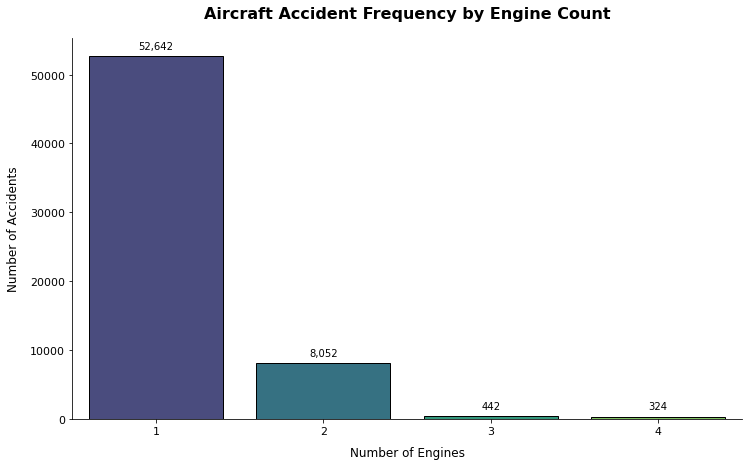


Accident Count by Engine Configuration:
| Number_of_Engines   | Accident_Count   |
|:--------------------|:-----------------|
| 1                   | 52642            |
| 2                   | 8052             |
| 3                   | 442              |
| 4                   | 324              |


In [241]:
#Let us check the influence of number of engines and the number of accidents



# 1. Data Preparation
engine_accidents = (df.dropna(subset=['Number_of_Engines'])  # Remove missing values
                   .groupby('Number_of_Engines', as_index=False)
                   .agg(Accident_Count=('Event_Id', 'count'))
                   .sort_values('Number_of_Engines'))  # Sort by engine count for logical ordering

# 2. Create Visualization
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=engine_accidents, 
                 x='Number_of_Engines', 
                 y='Accident_Count',
                 palette='viridis',
                 edgecolor='black')

# 3. Add Value Labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10,
                xytext=(0, 5),
                textcoords='offset points')

# 4. Style Enhancements
plt.title("Aircraft Accident Frequency by Engine Count", 
          pad=20, fontsize=16, fontweight='bold')
plt.xlabel("Number of Engines", fontsize=12, labelpad=10)
plt.ylabel("Number of Accidents", fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()  # Clean up plot borders

# 5. Save and Show
plt.savefig("engine_accident_analysis.png", 
           dpi=600, 
           bbox_inches="tight",
           transparent=False)
plt.show()

# 6. Display Supporting Data
print("\nAccident Count by Engine Configuration:")
print(engine_accidents.to_markdown(index=False, numalign="left", stralign="left"))



Aircraft with 1 engine account for the highest accident rates

2- and 4-engine aircraft show significantly fewer accidents

Accident rates decrease disproportionately with added engines e.g 4 engines don’t reduce accidents by 4x vs. 1 engine, suggesting safety depends more on operational context than engine count alone.

In [242]:
#We will use mean to replace the missing values of numerical variables
# Step 1: Select numerical columns
num_var = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Fill missing values with column means
df[num_var.columns] = df[num_var.columns].fillna(df[num_var.columns].mean())

# Verify no missing values in numerical columns
print(df[num_var.columns].isnull().sum())

Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
Year                      0
dtype: int64


In [243]:
#Aggregate all injuries 
df['Total_injuries']=df['Total_Fatal_Injuries']+df['Total_Serious_Injuries']+df['Total_Minor_Injuries']

#Group total injuries per year
cnt_injuries=df.groupby(['Year'])['Total_injuries'].sum().reset_index().sort_values(by='Year', ascending=True)

#Group total of uninjured per year
no_injuries=df.groupby(['Year'])['Total_Uninjured'].count().reset_index().sort_values(by='Year', ascending=True)

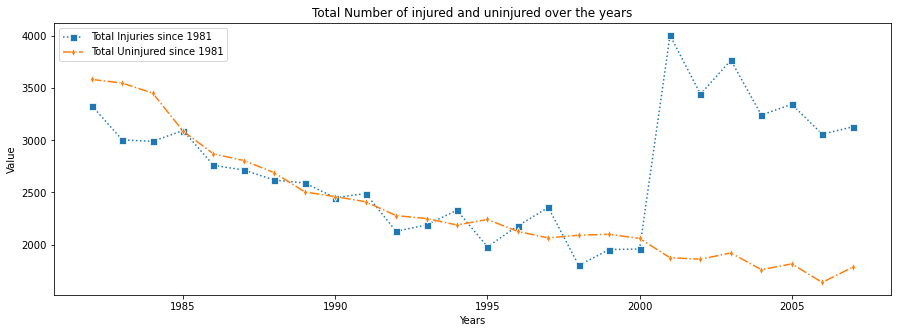

In [244]:
#Plot 2 graphs showing evolution of injuries and no injuries over time
plt.figure(figsize=(15,5))

sns.lineplot(data=cnt_injuries, x='Year', y='Total_injuries', label='Total Injuries since 1981', marker='s', markersize=7, linestyle='dotted')
sns.lineplot(data=no_injuries, x='Year', y='Total_Uninjured', label='Total Uninjured since 1981', marker='d', markersize=5, linestyle='dashdot')

plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Total Number of injured and uninjured over the years')
plt.legend()

#Export the graph
plt.savefig("linegraph2.png", dpi=500, bbox_inches="tight")

#Render plot
plt.show()

## Recommendation

The decrease in aviation accidents since since after 1981 is encouraging, but there are countries that one needs to deploy more measures to safeguard life and business. In high-accident states, there should be a concerted effort to increase surveillance and regulatory enforcement activities to mitigate the risks associated with aviation accidents.

Based on the fact that we had a high visual determining of weather, it is an indication that many accidents happened on a good weather, provoking pilots to use their eyes/visual for decision making. It is imperative to  reinforce guidance and adherence to protocals  when in the sky unless it is unavoidable.


The purpose came out as a big contributing factor in the number of accidents. Looking at the business model our stakeholder is interested in, business/commercial purpose seem to be in line with decreased accidents. 

At of the look of things, increased number of engines is a guarantee in eradication of accidents. While it would have a potential implication on the cost as well, this can better concluded when cost is in play